In [126]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from wordcloud import WordCloud

In [127]:
data = pd.read_csv('India_Menu.csv')
data.head()

,Menu Category,Menu Items,Per Serve Size,Energy (kCal),Protein (g),Total fat (g),Sat Fat (g),Trans fat (g),Cholesterols (mg),Total carbohydrate (g),Total Sugars (g),Added Sugars (g),Sodium (mg)
0,Regular Menu,McVeggie™ Burger,168 g,402.05,10.24,13.83,5.34,0.16,2.49,56.54,7.90,4.49,706.13
1,Regular Menu,McAloo Tikki Burger®,146 g,339.52,8.50,11.31,4.27,0.20,1.47,50.27,7.05,4.07,545.34
2,Regular Menu,McSpicy™ Paneer Burger,199 g,652.76,20.29,39.45,17.12,0.18,21.85,52.33,8.35,5.27,1074.58
3,Regular Menu,Spicy Paneer Wrap,250 g,674.68,20.96,39.10,19.73,0.26,40.93,59.27,3.50,1.08,1087.46
4,Regular Menu,American Veg Burger,177 g,512.17,15.30,23.45,10.51,0.17,25.24,56.96,7.85,4.76,1051.24


In [128]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141 entries, 0 to 140
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Menu Category           141 non-null    object 
 1   Menu Items              141 non-null    object 
 2   Per Serve Size          141 non-null    object 
 3   Energy (kCal)           141 non-null    float64
 4   Protein (g)             141 non-null    float64
 5   Total fat (g)           141 non-null    float64
 6   Sat Fat (g)             141 non-null    float64
 7   Trans fat (g)           141 non-null    float64
 8   Cholesterols (mg)       141 non-null    float64
 9   Total carbohydrate (g)  141 non-null    float64
 10  Total Sugars (g)        141 non-null    float64
 11  Added Sugars (g)        141 non-null    float64
 12  Sodium (mg)             140 non-null    float64
dtypes: float64(10), object(3)
memory usage: 14.4+ KB


In [129]:
data.isnull().sum()

Menu Category             0
Menu Items                0
Per Serve Size            0
Energy (kCal)             0
Protein (g)               0
Total fat (g)             0
Sat Fat (g)               0
Trans fat (g)             0
Cholesterols (mg)         0
Total carbohydrate (g)    0
Total Sugars (g)          0
Added Sugars (g)          0
Sodium (mg)               1
dtype: int64

In [130]:
data['Sodium (mg)'].fillna(0, inplace = True)

In [152]:
data.isnull().sum()

Menu Category             0
Menu Items                0
Per Serve Size            0
Energy (kCal)             0
Protein (g)               0
Total fat (g)             0
Sat Fat (g)               0
Trans fat (g)             0
Cholesterols (mg)         0
Total carbohydrate (g)    0
Total Sugars (g)          0
Added Sugars (g)          0
Sodium (mg)               0
dtype: int64

In [131]:
data.nunique()

Menu Category               7
Menu Items                141
Per Serve Size            107
Energy (kCal)             139
Protein (g)               117
Total fat (g)             111
Sat Fat (g)               107
Trans fat (g)              41
Cholesterols (mg)         113
Total carbohydrate (g)    133
Total Sugars (g)          125
Added Sugars (g)           79
Sodium (mg)               139
dtype: int64

In [132]:
data.shape

(141, 13)

In [133]:
data.columns

Index(['Menu Category', 'Menu Items', 'Per Serve Size', 'Energy (kCal)',
       'Protein (g)', 'Total fat (g)', 'Sat Fat (g)', 'Trans fat (g)',
       'Cholesterols (mg)', 'Total carbohydrate (g)', 'Total Sugars (g)',
       'Added Sugars (g)', 'Sodium (mg)'],
      dtype='object')

In [134]:
data.describe()

,Energy (kCal),Protein (g),Total fat (g),Sat Fat (g),Trans fat (g),Cholesterols (mg),Total carbohydrate (g),Total Sugars (g),Added Sugars (g),Sodium (mg)
count,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000
mean,244.635461,7.493546,9.991702,4.997589,0.687163,26.350071,31.190284,15.464894,10.336950,359.496312
std,185.554837,8.336863,10.339511,4.900451,6.326136,50.334200,20.602044,15.690202,14.283388,472.452558
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,116.360000,0.650000,0.460000,0.280000,0.060000,1.510000,15.740000,2.330000,0.000000,41.990000
50%,219.360000,4.790000,7.770000,4.270000,0.150000,8.390000,30.820000,9.160000,3.640000,150.900000
75%,339.520000,10.880000,14.160000,7.280000,0.220000,31.110000,46.000000,26.950000,19.230000,530.540000
max,834.360000,39.470000,45.180000,20.460000,75.260000,302.610000,93.840000,64.220000,64.220000,2399.490000


<h1>EDA</h1>

<AxesSubplot:>

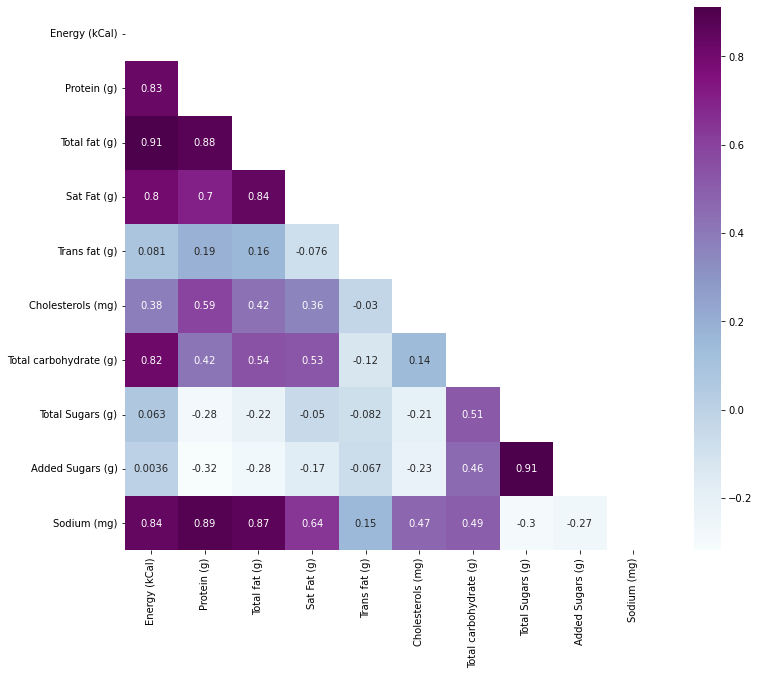

In [135]:
# checking correlation and strength of correlation between all nutrients in products
corr = data.drop(['Menu Category', 'Menu Items'], axis = 1).corr()
mask = np.triu(np.ones_like(corr, dtype = bool))

plt.figure(figsize = (12, 10))

sns.heatmap(corr, cmap = 'BuPu', mask = mask, annot = True)
# sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], cmap = 'BuPu', mask = mask, annot = True)

Some correlations to note:
- Strong correlation b/w Protein and Energy
- Strong correlation b/w Total Fat and Energy
- Strong correlation b/w Total Fat and Protein
- Strong correlation b/w Sodium and Energy
- Strong correlation b/w Sodium and Protein
- Strong correlation b/w Sodium and Total Fat

In [136]:
# calculating which menu category has the most (mean) energy  
data.groupby('Menu Category')['Energy (kCal)'].mean().sort_values(ascending = False)

Menu Category
Gourmet Menu       543.497273
Regular Menu       367.737778
McCafe Menu        183.679608
Breakfast Menu     181.290000
Desserts Menu      162.875000
Beverages Menu     143.326471
Condiments Menu     47.473333
Name: Energy (kCal), dtype: float64

Text(0.5, 1.0, 'Menu Category Wise Energy Plot')

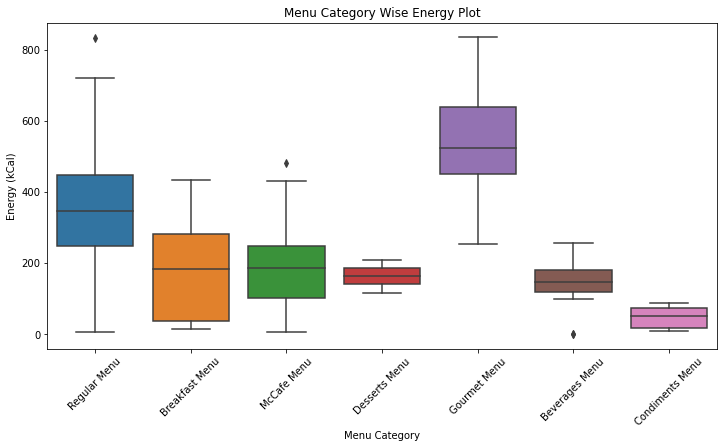

In [137]:
# plot to see energy present in each menu category
plt.figure(figsize = (12, 6))
axes = sns.boxplot(x = 'Menu Category', y = 'Energy (kCal)', data = data)
plt.xticks(rotation = 45)
plt.title('Menu Category Wise Energy Plot')

In [138]:
data.groupby('Menu Category')['Protein (g)'].mean().sort_values(ascending = False)

Menu Category
Gourmet Menu       21.684545
Regular Menu       12.990833
Breakfast Menu      7.636667
McCafe Menu         4.295490
Desserts Menu       2.815000
Condiments Menu     0.731111
Beverages Menu      0.268235
Name: Protein (g), dtype: float64

Text(0.5, 1.0, 'Menu Category Wise Protein Plot')

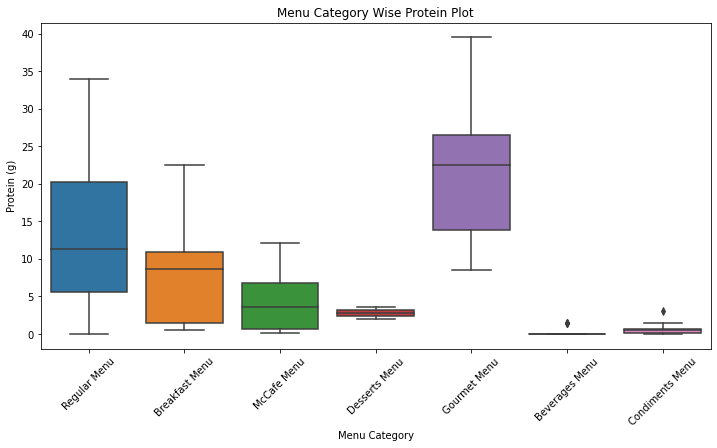

In [139]:
# plot to see protein present in each menu category
plt.figure(figsize = (12, 6))
axes = sns.boxplot(x = 'Menu Category', y = 'Protein (g)', data = data)
plt.xticks(rotation = 45)
plt.title('Menu Category Wise Protein Plot')

In [140]:
data.groupby('Menu Category')['Total fat (g)'].mean().sort_values(ascending = False)

Menu Category
Gourmet Menu       27.671818
Regular Menu       17.625833
Breakfast Menu      7.735333
McCafe Menu         5.945686
Desserts Menu       5.255000
Condiments Menu     3.876667
Beverages Menu      0.308824
Name: Total fat (g), dtype: float64

Text(0.5, 1.0, 'Menu Category Wise Total Fat Plot')

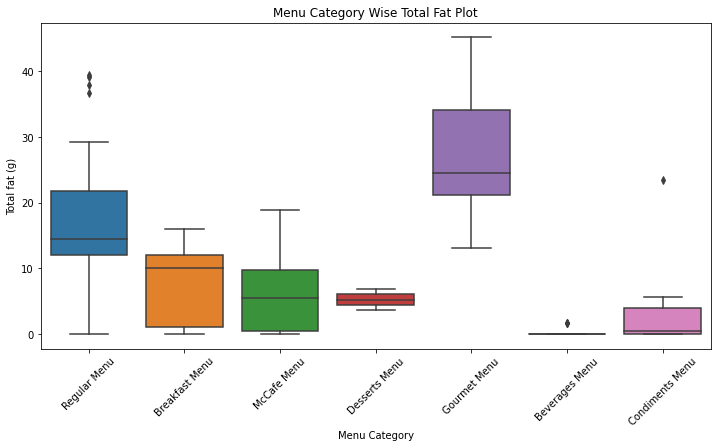

In [141]:
# plot to see total fat present in each menu category
plt.figure(figsize = (12, 6))
axes = sns.boxplot(x = 'Menu Category', y = 'Total fat (g)', data = data)
plt.xticks(rotation = 45)
plt.title('Menu Category Wise Total Fat Plot')

In [142]:
data.groupby('Menu Category')['Sat Fat (g)'].mean().sort_values(ascending = False)

Menu Category
Gourmet Menu       11.987273
Regular Menu        7.213333
McCafe Menu         4.558824
Breakfast Menu      4.354000
Desserts Menu       3.160000
Condiments Menu     0.572222
Beverages Menu      0.225882
Name: Sat Fat (g), dtype: float64

Text(0.5, 1.0, 'Menu Category Wise Sat Fat Plot')

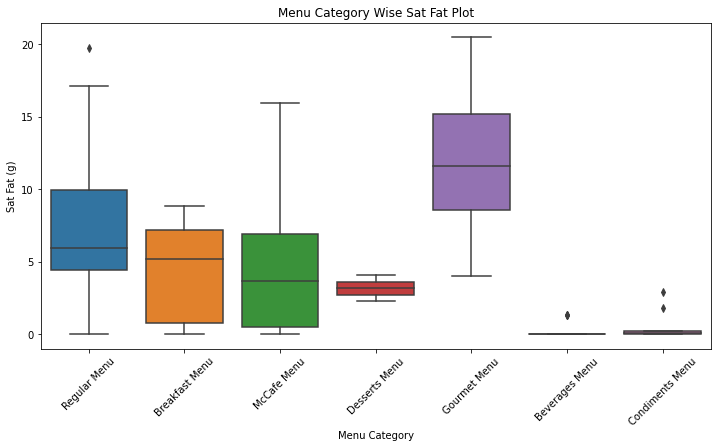

In [143]:
# plot to see total fat present in each menu category
plt.figure(figsize = (12, 6))
axes = sns.boxplot(x = 'Menu Category', y = 'Sat Fat (g)', data = data)
plt.xticks(rotation = 45)
plt.title('Menu Category Wise Sat Fat Plot')

In [144]:
data.groupby('Menu Category')['Trans fat (g)'].mean().sort_values(ascending = False)

Menu Category
Regular Menu       2.233333
McCafe Menu        0.219804
Gourmet Menu       0.194545
Breakfast Menu     0.146000
Desserts Menu      0.095000
Condiments Menu    0.067778
Beverages Menu     0.008824
Name: Trans fat (g), dtype: float64

Text(0.5, 1.0, 'Menu Category Wise Trans Fat Plot')

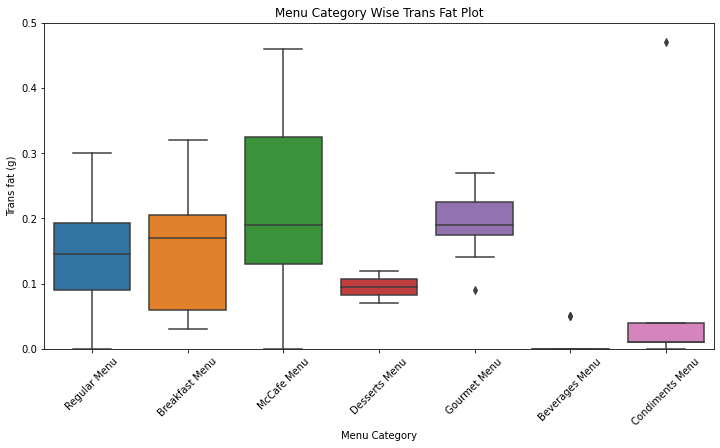

In [145]:
# plot to see trans fat present in each menu category
plt.figure(figsize = (12, 6))
plt.ylim(0, 0.5)
axes = sns.boxplot(x = 'Menu Category', y = 'Trans fat (g)', data = data)
plt.xticks(rotation = 45)
plt.title('Menu Category Wise Trans Fat Plot')

Text(0.5, 1.0, 'Menu Category Wise Cholesterol Plot')

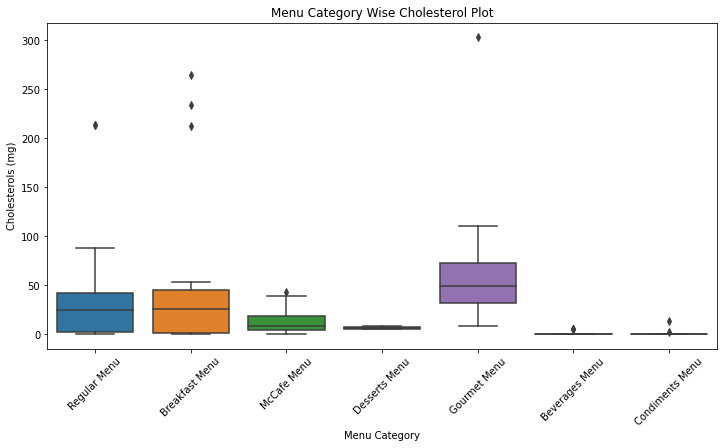

In [146]:
# plot to see Cholesterol present in each menu category
plt.figure(figsize = (12, 6))
# plt.ylim(0, 150)
axes = sns.boxplot(x = 'Menu Category', y = 'Cholesterols (mg)', data = data)
plt.xticks(rotation = 45)
plt.title('Menu Category Wise Cholesterol Plot')

In [147]:
data.groupby('Menu Category')['Total Sugars (g)'].mean().sort_values(ascending = False)

Menu Category
Beverages Menu     34.677059
McCafe Menu        22.615490
Desserts Menu      19.920000
Gourmet Menu        8.799091
Condiments Menu     6.104444
Regular Menu        5.019444
Breakfast Menu      4.358667
Name: Total Sugars (g), dtype: float64

Text(0.5, 1.0, 'Menu Category Wise Total Sugars Plot')

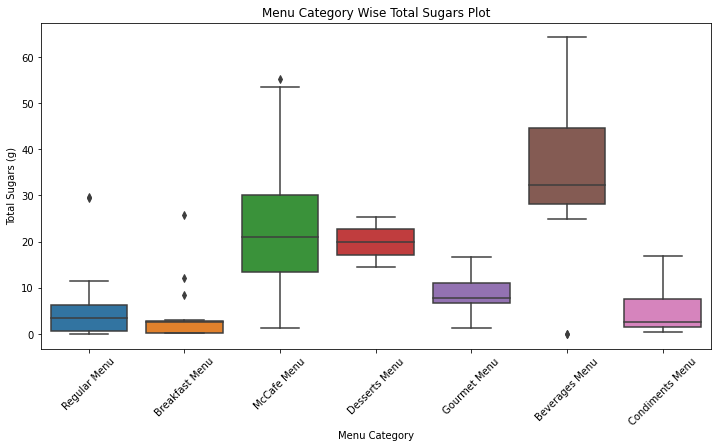

In [148]:
plt.figure(figsize = (12, 6))
axes = sns.boxplot(x = 'Menu Category', y = 'Total Sugars (g)', data = data)
plt.xticks(rotation = 45)
plt.title('Menu Category Wise Total Sugars Plot')

Findings from above groupby and plots:


<h3>Since fats, especially trans fats are most harmful to one's health, let's look more into this particular type of fat in detail and it's relation with other nutrients - if any.</h3>

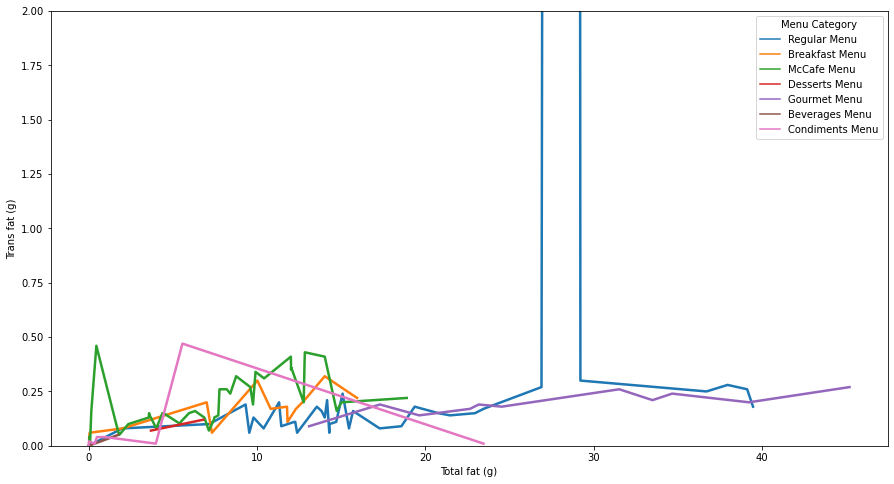

In [149]:
# since there was correlation b/w protein and energy
plt.figure(figsize = (15, 8))
plt.ylim(0, 2)
fig = sns.lineplot(x = 'Total fat (g)', y = 'Trans fat (g)', hue = 'Menu Category', linewidth = 2.5, data = data)

there seems to be an item/s in the Regular Menu which contains a considerably larger amount of trans fat comapred to all other
item, let's try to see what this Menu Item is so we know what to avoid

In [150]:
data.loc[data['Trans fat (g)'].idxmax()]

Menu Category                       Regular Menu
Menu Items                5 piece Chicken Strips
Per Serve Size                             145 g
Energy (kCal)                             411.09
Protein (g)                                25.43
Total fat (g)                              28.54
Sat Fat (g)                                 0.15
Trans fat (g)                              75.26
Cholesterols (mg)                            6.7
Total carbohydrate (g)                      0.73
Total Sugars (g)                            0.72
Added Sugars (g)                             0.0
Sodium (mg)                              1193.05
Name: 25, dtype: object

According to data from this dataset the 5 piece Chicken Strips contain maximum amount of trans fats, while I cannot confirm if the nutrition values are true in this dataset, this is a very unhealthy amount and if true, one should avoid consuming this menu item.

We have been looking at Menu Categories for the most part now let's take a closer look at individual menu items and what their nutritional values look like

In [151]:
print(data['Menu Items'].unique())
print('\nNumber of Unique Items on the McDonalds Indian Menu: ', data['Menu Items'].nunique())

['McVeggie™ Burger' 'McAloo Tikki Burger®' 'McSpicy™ Paneer Burger'
 'Spicy Paneer Wrap' 'American Veg Burger' 'Veg Maharaja Mac'
 'Green Chilli Aloo Naan' 'Pizza Puff' 'Mc chicken Burger'
 'FILLET-O-FISH Burger' 'Mc Spicy Chicken Burger' 'Spicy Chicken Wrap'
 'Chicken Maharaja Mac' 'American Chicken Burger' 'Chicken Kebab Burger'
 'Green Chilli Kebab naan' 'Mc Egg Masala Burger'
 'Mc Egg Burger for Happy Meal'
 'Ghee Rice with Mc Spicy Fried Chicken 1 pc' 'McSpicy Fried Chicken 1 pc'
 '4 piece Chicken McNuggets' '6 piece Chicken McNuggets'
 '9 piece Chicken McNuggets' '2 piece Chicken Strips'
 '3 piece Chicken Strips' '5 piece Chicken Strips' 'Regular Fries'
 'Medium Fries' 'Large Fries' 'Regular Wedges' 'Medium Wedges'
 'Large Wedges' 'L1 Coffee' 'L1 Coffee with milk'
 'Double Chocochips Muffin' 'Vanilla Chocochips Muffin' 'Veg McMuffin'
 'Double Cheese McMuffin' 'Spicy Egg McMuffin' 'Sausage Mc Muffin'
 'Sausage Mc Muffin with egg' 'Egg McMuffin' 'Hot Cake with maple syrup'
 'Hash B

<h4>Let's see which menu items have maximum values of a certain nutrient</h4> 

In [166]:
print('Max Energy (kCal) Items:\n ',data.groupby('Menu Items')['Energy (kCal)'].mean().sort_values(ascending = False).head(20))
print('\n\nMin Energy (KCal) Items:\n ', data.groupby('Menu Items')['Energy (kCal)'].mean().sort_values(ascending = False).tail(20))

Max Energy (kCal) Items:
  Menu Items
Chicken Cheese Lava Burger                    834.36
Veg Maharaja Mac                              832.67
Ghee Rice with Mc Spicy Fried Chicken 1 pc    720.30
Chicken Maharaja Mac                          689.12
Spicy Paneer Wrap                             674.68
Cheese Lava Burger                            671.06
McSpicy™ Paneer Burger                        652.76
Chunky Chipotle American Burger Chicken       641.36
McSpicy Premium Veg Burger                    634.71
McSpicy Premium Chicken Burger                622.25
Spicy Chicken Wrap                            567.19
American Triple Cheese Veg                    524.69
Piri piri Mc Spicy Veg Burger                 517.98
American Veg Burger                           512.17
Chocolate Oreo Frappe                         481.11
American Triple Cheese Chicken                457.94
Mc Spicy Chicken Burger                       451.92
Large Fries                                   449.17
American

In [167]:
print('Max Total fat (g) Items:\n ', data.groupby('Menu Items')['Total fat (g)'].mean().sort_values(ascending = False).head(20))
print('\n\nMin Total fat (g) Items:\n ', data.groupby('Menu Items')['Total fat (g)'].mean().sort_values(ascending = False).tail(20))

Max Total fat (g) Items:
  Menu Items
Chicken Cheese Lava Burger                    45.18
McSpicy™ Paneer Burger                        39.45
McSpicy Premium Veg Burger                    39.21
Spicy Paneer Wrap                             39.10
Veg Maharaja Mac                              37.94
Chicken Maharaja Mac                          36.69
McSpicy Premium Chicken Burger                34.65
Cheese Lava Burger                            33.48
Chunky Chipotle American Burger Chicken       31.51
Ghee Rice with Mc Spicy Fried Chicken 1 pc    29.20
5 piece Chicken Strips                        28.54
Spicy Chicken Wrap                            26.89
Piri piri Mc Spicy Veg Burger                 24.53
Tomato Ketchup Sachets                        23.45
American Veg Burger                           23.45
American Triple Cheese Veg                    23.16
American Chicken Burger                       22.94
American Triple Cheese Chicken                22.65
9 piece Chicken McNuggets 

In [168]:
print('Max Sodium (mg) Items:\n ', data.groupby('Menu Items')['Sodium (mg)'].mean().sort_values(ascending = False).head(20))
print('\n\nMin Sodium (mg) Items:\n ', data.groupby('Menu Items')['Sodium (mg)'].mean().sort_values(ascending = False).tail(20))

Max Sodium (mg) Items:
  Menu Items
Ghee Rice with Mc Spicy Fried Chicken 1 pc    2399.49
Chunky Chipotle American Burger Chicken       1906.27
Chicken Maharaja Mac                          1854.71
Chicken Cheese Lava Burger                    1745.04
McSpicy Premium Chicken Burger                1614.88
Veg Maharaja Mac                              1529.22
McSpicy Premium Veg Burger                    1446.87
American Triple Cheese Chicken                1396.17
5 piece Chicken Strips                        1193.05
American Triple Cheese Veg                    1174.27
Piri piri Mc Spicy Veg Burger                 1170.89
Cheese Lava Burger                            1153.99
Spicy Chicken Wrap                            1152.38
American Chicken Burger                       1132.30
Spicy Paneer Wrap                             1087.46
McSpicy™ Paneer Burger                        1074.58
American Veg Burger                           1051.24
Mc Spicy Chicken Burger                       

Menu Items
Americano (S)                   0.03
Espresso                        0.03
Mixed Fruit Beverage            0.02
Chilli Sauce                    0.01
Vedica Natural Mineral Water    0.00
Medium Thums-up                 0.00
Small Thums-up                  0.00
Small Sprite                    0.00
Small Fanta Oragne              0.00
Small Coca-Cola                 0.00
L1 Coffee                       0.00
Large Thums-up                  0.00
Coke Zero Can                   0.00
Large Coca-Cola                 0.00
Medium Coca-Cola                0.00
Medium Fanta Orange             0.00
Large Fanta Oragne              0.00
Large Sprite                    0.00
Medium Sprite                   0.00
Maple Syrup                     0.00
Name: Total fat (g), dtype: float64